### 1. Testing the development environment

In [12]:
import cv2
import numpy as np
import dlib

# Checking the OpenCV version
print("OpenCV version", cv2.__version__)

# Checking the Numpy version
print("Numpy version", np.__version__)

# Checking the dlib version
print("Dlib version", dlib.__version__)

OpenCV version 3.1.0
Numpy version 1.13.1
Dlib version 19.6.1


### 2. Finding Landmark points in an image

Plotting Landmark Points
146 105
151 135
155 163
160 191
171 218
191 239
214 257
240 272
270 276
299 271
321 252
338 231
350 207
355 180
356 153
357 127
356 100
171 97
184 84
204 81
225 82
247 87
279 86
298 80
316 77
336 78
346 91
263 106
265 126
266 146
268 166
242 170
254 176
268 181
280 175
290 168
197 110
208 104
222 103
234 111
221 114
208 114
289 109
302 102
316 100
326 107
316 112
303 111
219 200
237 197
253 196
267 198
278 195
294 195
311 197
296 210
281 216
268 217
254 216
238 211
227 202
253 202
267 204
279 201
304 199
280 203
268 205
254 204


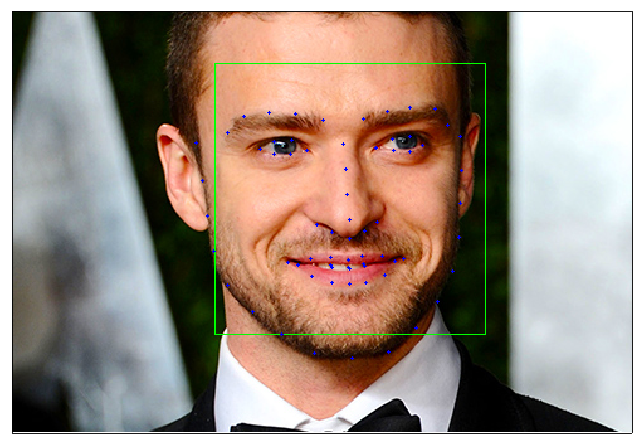

In [5]:
# Using dlib to detect the faces in an image

import cv2
import dlib
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from collections import OrderedDict

%matplotlib inline 

PATH = os.path.join("..","..","dependencies")
FILE_NAME = "shape_predictor_68_face_landmarks.dat"

IMAGE_PATH = os.path.join("..","images","faces","Justin_Timberlake.jpg")

predictor = dlib.shape_predictor(os.path.join(PATH,FILE_NAME))

# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),
    ("jaw", (0, 17))
])

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords


def draw_bb(image, bound):
    image = image.copy() 
    
    pt1 = ( bound.left(), bound.top())
    pt2 = ( bound.right(), bound.bottom())    
    
    return cv2.rectangle(image, pt1, pt2, (0,255,0), thickness=1, lineType=8, shift=0)       


detector = dlib.get_frontal_face_detector()

im  =  mpimg.imread(IMAGE_PATH) # this is the input image

oim = im.copy()

dets = detector(im)

for k, d in enumerate(dets): 
        im = draw_bb(im,d)
        
        gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)     
        
        shape = predictor(gray, d)
        
        shape = shape_to_np(shape)
        
        print("Plotting Landmark Points")
        for (x, y) in shape:
                cv2.circle(im, (x, y), 1, (0, 0, 255), -1)
                print(x,y)
        
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(im)
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Finding Pose in an Image

Camera Matrix :
 [[ 345.     0.   172.5]
 [   0.   345.   100. ]
 [   0.     0.     1. ]]
Rotation Vector:
 [[-0.82912301]
 [ 4.50801311]
 [ 0.56974421]]
Translation Vector:
 [[ -290.96626664]
 [  394.36601209]
 [-3306.18724377]]
Angle : 32.045567323204324


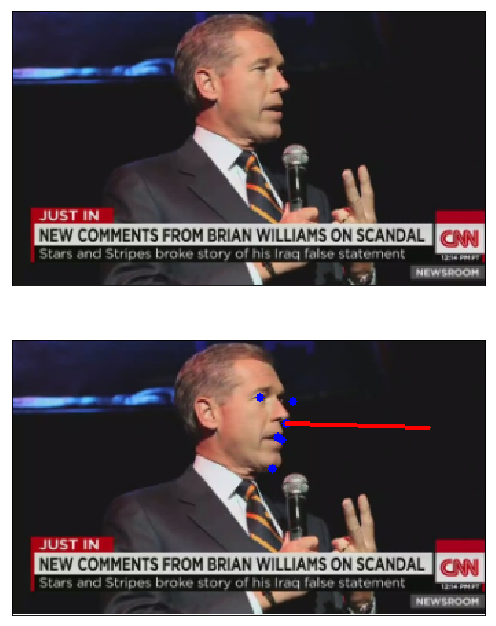

In [7]:
# Head-Pose Estimation

import os
import cv2
import math
import dlib
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from collections import OrderedDict

%matplotlib inline 

PATH = os.path.join("..","..","dependencies")
FILE_NAME = "shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(os.path.join(PATH,FILE_NAME))

#Image Space Landmarks
FACIAL_LANDMARKS = OrderedDict([
    ("nose_tip"   , 34),
    ("chin"       , 8 ),
    ("left_eye"   , 37),
    ("right_eye"  , 46),
    ("left_mouth" , 61),
    ("right_mouth", 65)
])

IMAGE_PATH = os.path.join("..","images","head_pose","brian_williams.png")

def angle(a, b, c):

    # Create vectors from points
    ba = [ aa-bb for aa,bb in zip(a,b) ]
    bc = [ cc-bb for cc,bb in zip(c,b) ]

    # Normalize vector
    nba = math.sqrt ( sum ( (x**2.0 for x in ba) ) )
    ba = [ x/nba for x in ba ]

    nbc = math.sqrt ( sum ( (x**2.0 for x in bc) ) )
    bc = [ x/nbc for x in bc ]

    # Calculate scalar from normalized vectors
    scal = sum ( (aa*bb for aa,bb in zip(ba,bc)) )

    # calculate the angle in radian
    angle = math.degrees(math.acos(scal))
    
    return angle

# function to read the image from file
def get_image(path):
    img = Image.open(path)
    img = np.array(img)
    
    #removes the alpha channel if it exists
    if img.shape[2] > 3:
        img  = img[:,:,0:3]     
    return np.array(img)


def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords


def draw_bb(image, bound):
    image = image.copy() 
    
    pt1 = ( bound.left(), bound.top())
    pt2 = ( bound.right(), bound.bottom())    
    
    return cv2.rectangle(image, pt1, pt2, (0,255,0), thickness=1, lineType=8, shift=0)       


detector = dlib.get_frontal_face_detector()

im  = get_image(IMAGE_PATH) # this is the input image

oim = im.copy() # making a copy of the original image

size = im.shape # size og the image

dets = detector(im) # running the face detector on the image to find faces
        
image_points = []

for k, d in enumerate(dets): 
    gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
    
    shape = predictor(gray, d)    
    shape = shape_to_np(shape)
    
    for name in FACIAL_LANDMARKS.keys(): #looping through designated landmarks in image space and map to obj space
        lmark = FACIAL_LANDMARKS[name]
        x,y = shape[lmark]
        image_points.append((x,y))
        
image_points = np.array(image_points,dtype="double")

object_points = np.array([
                            (0.0, 0.0, 0.0),             # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-225.0, 170.0, -135.0),     # Left eye left corner
                            (225.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner
                         
                        ])

# Camera internals
 
focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )
 
print("Camera Matrix :\n {0}".format(camera_matrix))
 
dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
(success, rotation_vector, translation_vector) = cv2.solvePnP(object_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)
 
print("Rotation Vector:\n {0}".format(rotation_vector))
print("Translation Vector:\n {0}".format(translation_vector))
 
 
# Project a 3D point (0, 0, 1000.0) onto the image plane.
# We use this to draw a line sticking out of the nose
 
 
(nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)
 
for p in image_points:
    cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,0,255), -1)
 
 
p1 = ( int(image_points[0][0]), int(image_points[0][1]))
p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))
 
cv2.line(im, p1, p2, (255,0,0), 2)

p3 = ( p2[0], 0)



fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.imshow(oim)
plt.xticks([]), plt.yticks([])


plt.subplot(212)
plt.imshow(im)
plt.xticks([]), plt.yticks([])

print("Angle : {0}".format(angle(p3,p1,p2)))

plt.show()

### 4. Finding Head Pose in a Video Stream

In [8]:
detector = dlib.get_frontal_face_detector()

In [9]:
# Real-Time Facial Landmark in Videos

def process_image(frame):
    
    dets = detector(frame)

    for k, d in enumerate(dets): 

            gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)     

            shape = predictor(gray, d)

            shape = shape_to_np(shape)

            for (x, y) in shape:
                    cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
                
    return frame

In [10]:
# Real-Time Facial Landmark in Videos 

def process_image(frame):
    
    #Image Space Landmarks
    FACIAL_LANDMARKS = OrderedDict([
        ("nose_tip"   , 34),
        ("chin"       , 8 ),
        ("left_eye"   , 37),
        ("right_eye"  , 46),
        ("left_mouth" , 61),
        ("right_mouth", 65)
    ])

    
    size = frame.shape
    
    dets = detector(frame)
    
    image_points = []

    for k, d in enumerate(dets): 

            gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)     

            shape = predictor(gray, d)

            shape = shape_to_np(shape)
            
            for name in FACIAL_LANDMARKS.keys(): #looping through designated landmarks in image space and map to obj space
                lmark = FACIAL_LANDMARKS[name]
                x,y = shape[lmark]
                image_points.append((x,y))
                cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
    
    if(len(image_points) < 4):
        return frame
    
    image_points = np.array(image_points,dtype="double")
    
    object_points = np.array([
                                        (0.0, 0.0, 0.0),             # Nose tip
                                        (0.0, -330.0, -65.0),        # Chin
                                        (-225.0, 170.0, -135.0),     # Left eye left corner
                                        (225.0, 170.0, -135.0),      # Right eye right corne
                                        (-150.0, -150.0, -125.0),    # Left Mouth corner
                                        (150.0, -150.0, -125.0)      # Right mouth corner

                                    ])

    # Camera internals

    focal_length = size[1]
    center = (size[1]/2, size[0]/2)
    camera_matrix = np.array(
                                     [[focal_length, 0, center[0]],
                                     [0, focal_length, center[1]],
                                     [0, 0, 1]], dtype = "double"
                                     )
        
    dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
    (success, rotation_vector, translation_vector) = cv2.solvePnP(object_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

    (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)

    p1 = ( int(image_points[0][0]), int(image_points[0][1]))
    p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

    cv2.line(frame, p1, p2, (255,0,0), 2)
    
    
    return frame

In [11]:
# Installing ffmpeg for playing video's in notebook
import imageio

imageio.plugins.ffmpeg.download()

ImportError: No module named 'imageio'

In [37]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os

INPUT_VIDEO  = os.path.join("images","videos","Seth_Meyers.mp4")
OUTPUT_VIDEO = os.path.join("images","videos","Seth_Meyers_Processed.mp4") 

input_video = VideoFileClip(INPUT_VIDEO).subclip(0,30)
input_clip = input_video.fl_image(process_image)
%time input_clip.write_videofile(OUTPUT_VIDEO, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(OUTPUT_VIDEO))

[MoviePy] >>>> Building video images/videos/Seth_Meyers_Processed.mp4
[MoviePy] Writing video images/videos/Seth_Meyers_Processed.mp4



 34%|███▍      | 309/900 [00:58<01:49,  5.38it/s]


 69%|██████▊   | 617/900 [01:54<00:49,  5.74it/s]


100%|██████████| 900/900 [02:43<00:00,  5.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: images/videos/Seth_Meyers_Processed.mp4 

CPU times: user 2min 34s, sys: 1.71 s, total: 2min 35s
Wall time: 2min 44s
